# **Landmark Detection**

### **Imports**

In [35]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image
!pip install numpy==1.26.4
!pip uninstall opencv-python -y
!pip install "opencv-python<4.8.0"
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl.metadata (18 kB)
Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


### **Pre-processing**

In [36]:
df = pd.read_csv("train.csv")
base_path = "./images/"

In [37]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
1048570,2f04f76ed3311edd,https://upload.wikimedia.org/wikipedia/commons...,35138
1048571,a43fda3e09d0191f,https://upload.wikimedia.org/wikipedia/commons...,124107
1048572,f0817a7756fa372a,https://upload.wikimedia.org/wikipedia/commons...,142988
1048573,ec007f5a06d69cb8,https://upload.wikimedia.org/wikipedia/commons...,94891


### **Dataset Summary**

In [38]:
samples = 20000
df = df.loc[df["id"].str.startswith('00', na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [39]:
num_classes

3848

In [40]:
num_data

4071

In [41]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,138982,10
1,194914,5
2,164773,4
3,62798,4
4,2079,4


In [42]:
data.tail()

,landmark_id,count
3843,202508,1
3844,178300,1
3845,117347,1
3846,72871,1
3847,51204,1


In [43]:
data.columns = ['landmark_id','count']

In [44]:
data['count'].describe()

count    3848.000000
mean        1.057952
std         0.301662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: count, dtype: float64

### **Visualisation**

(array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 2., 0., 0., 2., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 2., 0., 1., 0., 1.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 2., 1., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 2., 2., 1., 1., 0., 0., 1., 0., 0., 1., 2., 1., 4.]),
 array([   0.  ,   38.43,   76.86,  115.29,  153.72,  192.15,  230.58,
         269.01,  307.44,  345.87,  384.3 ,  422.73,  461.16,  499.59,
         538.02,  576.45,  614.88,  653.31,  691.74,  730.17,  768.6 ,
         807.03,  845.46,  883.89,  922.32,  960.75,  999.18, 1037.61,
        1076.04, 1114.47, 1152.9 , 1191.33, 1229.76, 1268.19, 1306.62,
        1345.05, 1383.48, 1421.91, 1460.34, 1498.77, 1537.2 , 1575.63,
        1614.06, 1652.49, 1690.92, 1729.35, 1767.78, 1806.21, 1844.64,
        1883.07, 1921.5 , 1959.93, 1998.36, 2036.79, 

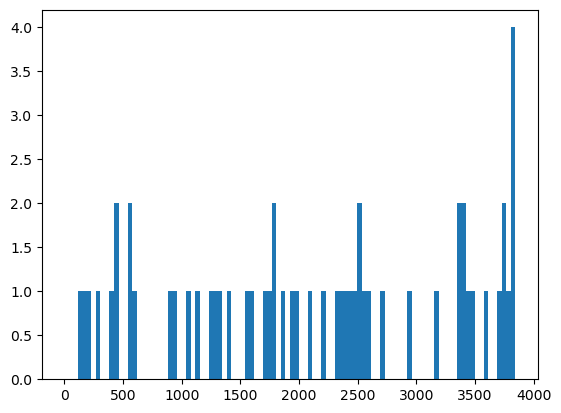

In [54]:
plt.hist(data['landmark_id'], 100, range = (0, 3843), label = 'test')

In [55]:
data['count'].between(0,5).sum()

3847

In [56]:
data['count'].between(5,10).sum()

2

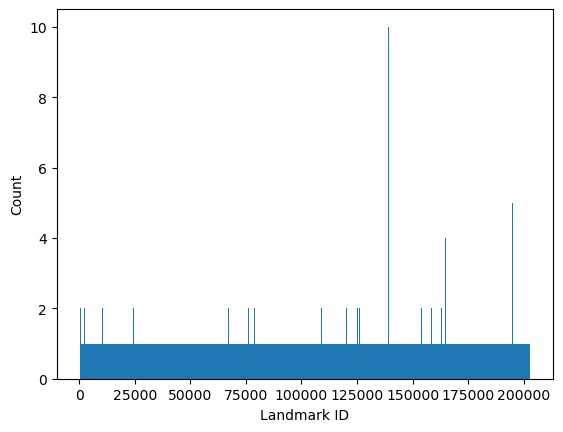

In [57]:
plt.hist(df["landmark_id"], bins=np.sort(df["landmark_id"].unique()))
plt.xlabel("Landmark ID")
plt.ylabel("Count")
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [59]:
df.head()

,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937


In [60]:
def encode_label(lb1):
    return lencoder.transform(lb1)

In [61]:
def decode_label(lb1):
    return lencoder.inverse_transform(lb1)

In [62]:
def get_image_from_number(num, dataframe):
    fname = dataframe.iloc[num]["id"] + '.jpg'
    label = dataframe.iloc[num]["landmark_id"]
    img_path = os.path.join('./images', fname)

    image = cv2.imread(img_path)
    if image is None:
        # Skip missing images by returning None
        return None, None
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, label


4 Sample images from random classes


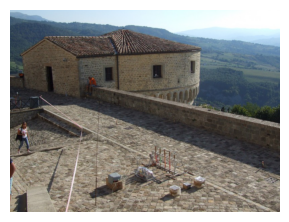

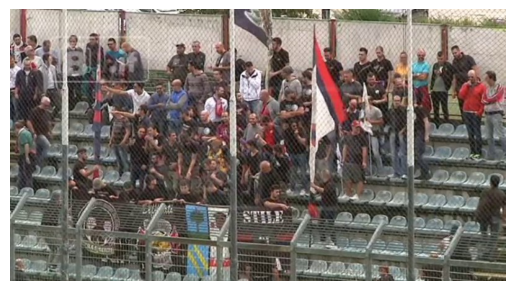

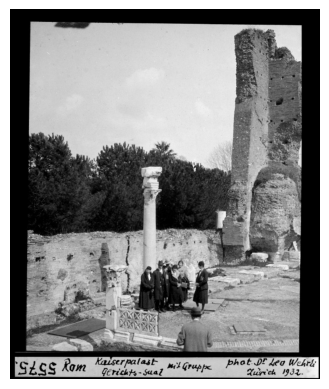

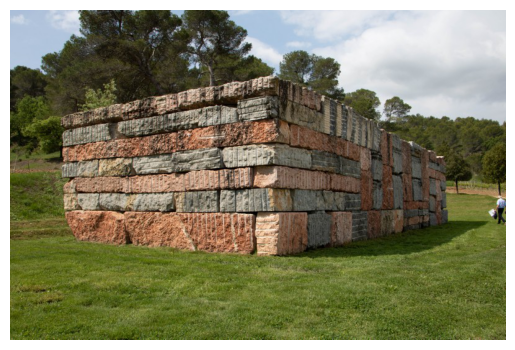

In [63]:
print("4 Sample images from random classes")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path + '/' + ri[0] + '/' +ri[1] + '/' +ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### **Training**

In [64]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential


In [65]:
learning_rate = 0.0001
decay_speed = 1e-6
momentum = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)

In [66]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_1                │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,8

 Total params: 155,335,508 (592.56 MB)

 Trainable params: 155,335,502 (592.56 MB)

 Non-trainable params: 6 (24.00 B)

In [67]:
from keras.optimizers import RMSprop
optim1 = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optim1,
              loss=loss_function,
              metrics = ["accuracy"])

In [68]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [69]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []
    end_img = min(start + batch_size, len(dataframe))

    for idx in range(start, end_img):
        im, label = get_image_from_number(idx, dataframe)

        # Skip if image is missing
        if im is None:
            continue

        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)

    # Return empty arrays if no images were loaded in this batch
    if len(image_array) == 0:
        return np.array([]), np.array([])

    return np.array(image_array), np.array(label_array)


In [70]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

train, val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

3256
815


In [71]:
for e in range(epochs):
    print(f"Epoch: {e+1}/{epochs}")
    
    if epoch_shuffle:
        train = train.sample(frac=1).reset_index(drop=True)
    
    num_batches = int(np.ceil(len(train) / batch_size))
    for it in range(num_batches):
        X_train, y_train_raw = get_batch(train, it * batch_size, batch_size)

        if X_train.shape[0] == 0:
            continue

        y_train = encode_label(y_train_raw)

        loss, acc = model.train_on_batch(X_train, y_train)

        if it % 10 == 0:
            print(f"  Batch {it+1}/{num_batches}  Loss: {loss:.4f}  Acc: {acc:.4f}")

model.save("Model.keras")
print("Model saved successfully.")


Epoch: 1/1
Model saved successfully.


### **Prediction**

In [72]:
errors = 0
bad_preds = []
good_preds = []

for it in range(int(np.ceil(len(val) / batch_size))):
    X_val, y_val = get_batch(val, it * batch_size, batch_size)

    if X_val.shape[0] == 0:
        continue

    result = model.predict(X_val, verbose=0)  # verbose=0 disables progress bar
    cla = np.argmax(result, axis=1)

    for idx, res in enumerate(result):
        index_in_data = batch_size * it + idx
        if cla[idx] != y_val[idx]:
            errors += 1
            bad_preds.append((index_in_data, cla[idx], res[cla[idx]]))
        else:
            good_preds.append((index_in_data, cla[idx], res[cla[idx]]))

print(f"Total Errors: {errors}")
print(f"Accuracy: {(1 - errors / len(val)) * 100:.2f}%")

for i in range(min(5, len(good_preds))):
    n = good_preds[i][0]
    img, lb1 = get_image_from_number(n, val)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(img)
        plt.title(f"Predicted: {decode_label([good_preds[i][1]])[0]}")
        plt.axis('off')
        plt.show()


Total Errors: 0
Accuracy: 100.00%
